#Использование полносвязной нейронной сети для распознавания моделей одежды в Keras


[Keras](https://ru.wikipedia.org/wiki/Keras) — открытая библиотека, написанная на языке Python и обеспечивающая взаимодействие с искусственными нейронными сетями. Она представляет собой надстройку над фреймворком TensorFlow. Нацелена на оперативную работу с сетями глубинного обучения, при этом спроектирована так, чтобы быть компактной, модульной и расширяемой. Она была создана как часть исследовательских усилий проекта ONEIROS (англ. Open-ended Neuro-Electronic Intelligent Robot Operating System), а ее основным автором и поддерживающим является Франсуа Шолле (фр. François Chollet), инженер Google.

Планировалось что Google будет поддерживать Keras в основной библиотеке TensorFlow, однако Шолле выделил Keras в отдельную надстройку, так как согласно концепции Keras является скорее интерфейсом, чем сквозной системой машинного обучения. Keras предоставляет высокоуровневый, более интуитивный набор абстракций, который делает простым формирование нейронных сетей, независимо от используемой в качестве вычислительного бэкенда библиотеки научных вычислений.

В Keras встроены средства работы с популярными наборами данных. База данных MNIST (сокращение от «Modified National Institute of Standards and Technology») — объёмная база данных образцов рукописного написания цифр. База данных является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения в первую очередь на основе нейронных сетей. Fashion MNIST содержит 70 000 изображений элементов одежды в 10 категориях в градациях серого. Изображения содержат предметы одежды в  разрешении 28х28 пикселей.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

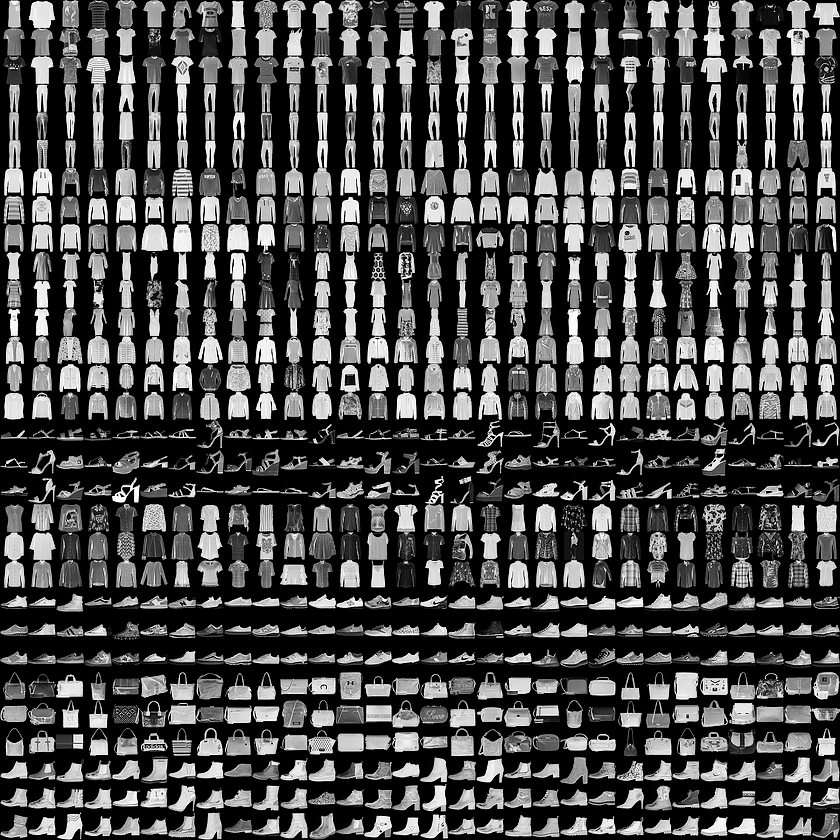

Создадим список с названиями классов

In [2]:
classes = ['Футболка', 'Брюки', 'Свитер', 'Платье', 'Пальто', 'Туфли', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботинки']

## Подготовка данных для обучения сети

**Загрузим данные**

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


и отобобразим часть изображений

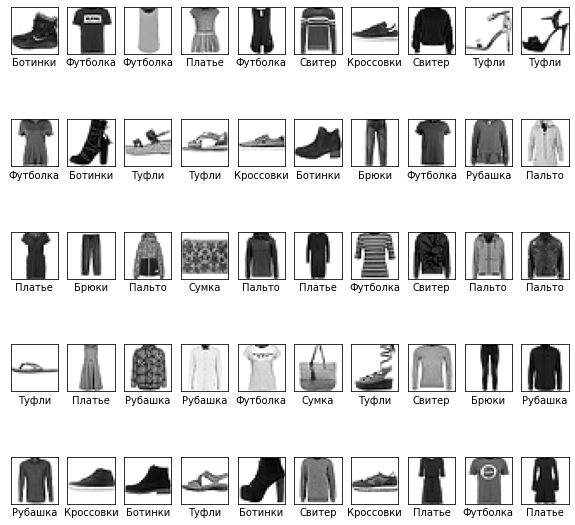

In [4]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности и нормализация данных**

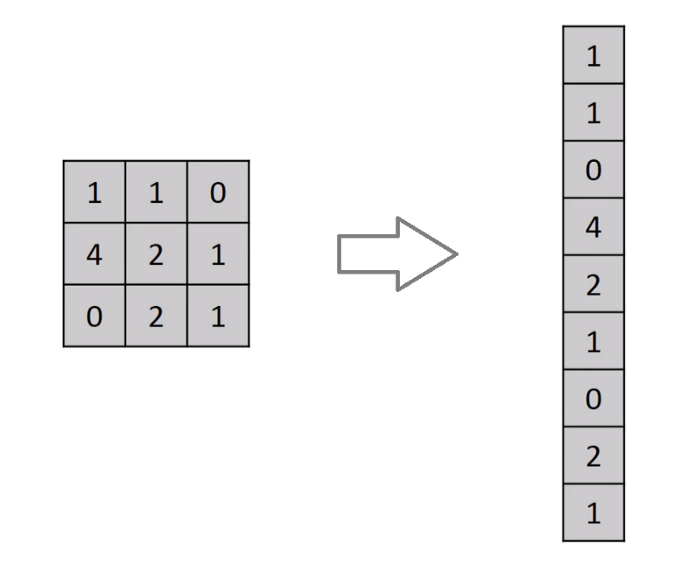

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

Значение интенсивности пикселей в изображении находится в интервале [0,255]. Для наших целей их необходимо нормализовать - привести к значениям в интервале [0,1].

In [6]:
x_train = x_train / 255 
x_test = x_test / 255 

Посмотрим, как выглядит ответ

In [7]:
n = 0
print(y_train[n])

9


Преобразуем метки классов в удобный для обучения нейронной сети формат **(one hot encoding)**

In [8]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

Теперь ответ выглядит так:

In [9]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Метка целевого класса в этом наборе имеет значение **1**

## Создаем нейронную сеть

Вот некоторые функции активации. В качестве функции активации используем для входного и последующих слоев ReLU, а для выходного слоя - SoftMax.

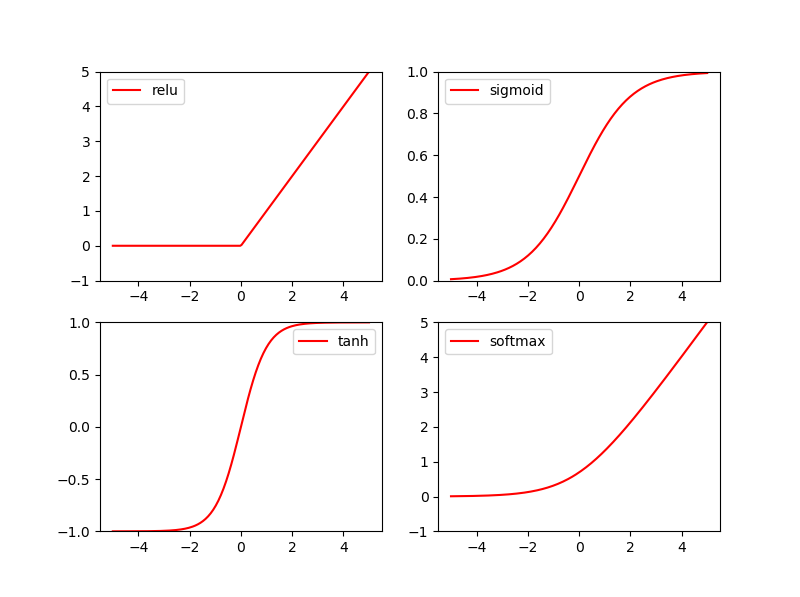

Конструируем нейронную сеть:

In [10]:
model = Sequential() # Создаем последовательную модель нейронной сети
model.add(Dense(400, input_dim=784, activation="relu")) # Входной полносвязный слой, 400 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=400, activation="relu")) # 1 скрытый слой
model.add(Dense(400, input_dim=400, activation="relu")) # 2 скрытый слой
model.add(Dense(10, activation="softmax")) # Выходной полносвязный слой, 10 нейронов (по количеству классов)

**Компилируем сеть**

Перед обучением модели ещё необходимо выполнить настройки при сборке модели (в методе compile):

* **loss** (функция потерь) - оценка желаемого значения относительно спрогнозированного, применим **categorical_crossentropy** (кроссэнтропию) - функцию штрафа, которую следует использовать для задач классификации, как у нас;
* **optimizer** (функция оптимизации) - агоритм "подгонки" внутренних параметров (весов и смещений) модели для минимизации функции потерь, optimizer="SGD" Стохастический градиентный спуск (англ. Stochastic gradient descent, SGD);
* **metrics** (метрики) - используются для мониторинга процесса тренировки и тестирования, metrics=['accuracy'] значит, что мы будем вычислять в модели не только функцию штрафа, но и число правильно классифицированных примеров


In [11]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 10)                4010      
                                                                 
Total params: 638,810
Trainable params: 638,810
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

Это самая ресурсоемкая операция. Мы выполняем обучение "пачками" (mini-batch) по batch_size=200 примеров. При этом, осуществляет epochs=100 проходов по всем входным примерам.

Другие варианты режима обучения:

1) по одному примеру - медленная сходимость, и алгоритм "не видит" хороших минимумов,

2) по всем примерам сразу - трудоемко, часто сходимость к локальному минимуму и склонность к переобучению.

А обработка mini-batch - промежуточный вариант

In [12]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2, # Доля валидационной выборки для контроля переобучения
                    verbose=1) #verbose=0 ничего не покажет, verbose=1 покажет анимированный индикатор выполнения (progress_bar), verbose=2 будет просто указать номер эпохи

Epoch 1/100
240/240 [==============================] - 5s 7ms/step - loss: 1.3363 - accuracy: 0.6210 - val_loss: 0.8515 - val_accuracy: 0.7203
Epoch 2/100
240/240 [==============================] - 2s 7ms/step - loss: 0.7502 - accuracy: 0.7512 - val_loss: 0.6654 - val_accuracy: 0.7773
Epoch 3/100
240/240 [==============================] - 2s 7ms/step - loss: 0.6306 - accuracy: 0.7912 - val_loss: 0.5907 - val_accuracy: 0.7998
Epoch 4/100
240/240 [==============================] - 2s 7ms/step - loss: 0.5725 - accuracy: 0.8070 - val_loss: 0.5475 - val_accuracy: 0.8139
Epoch 5/100
240/240 [==============================] - 2s 7ms/step - loss: 0.5331 - accuracy: 0.8195 - val_loss: 0.5162 - val_accuracy: 0.8232
Epoch 6/100
240/240 [==============================] - 2s 6ms/step - loss: 0.5102 - accuracy: 0.8252 - val_loss: 0.5056 - val_accuracy: 0.8233
Epoch 7/100
240/240 [==============================] - 2s 6ms/step - loss: 0.4882 - accuracy: 0.8307 - val_loss: 0.4815 - val_accuracy: 0.8308

## Сохраняем нейронную сеть для последующего использования

In [13]:
model.save('NN.h5')

In [14]:
!ls

NN.h5  sample_data


In [15]:
files.download('NN.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [16]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 2s 4ms/step - loss: 0.3430 - accuracy: 0.8768
Доля верных ответов на тестовых данных, в процентах: 87.68


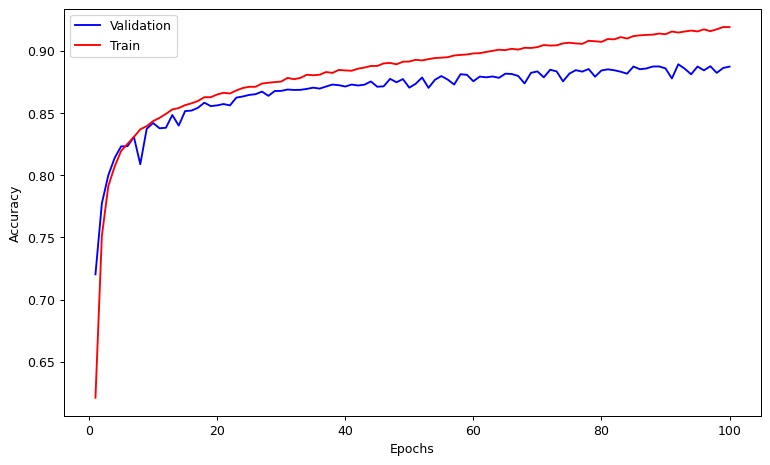

In [17]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Используем сеть для распознавания предметов одежды

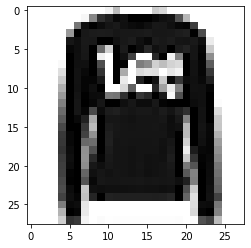

In [23]:
n_test = 1
plt.imshow(x_test[n_test].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [24]:
x = x_test[n_test]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание и выводим результат**

In [25]:
prediction = model.predict(x)
prediction

array([[8.1308972e-06, 1.0714259e-08, 9.9677211e-01, 3.3182886e-08,
        2.8200480e-03, 2.0528366e-12, 3.9963002e-04, 4.2202751e-13,
        4.5973668e-08, 3.2184717e-12]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [26]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 2
Название класса: Свитер


**Печатаем правильный ответ**

In [27]:
label = np.argmax(y_test[n_test])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 2
Название класса: Свитер


## Загружаем изображения с диска

In [28]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving Ботинки.jpg to Ботинки.jpg
Saving Брюки.jpg to Брюки.jpg
Saving Пальто.jpg to Пальто.jpg
Saving Пальто2.jpg to Пальто2.jpg
Saving Платье.jpg to Платье.jpg
Saving Рубашка.jpg to Рубашка.jpg
Saving Свитер.jpg to Свитер.jpg
Saving Сумка.jpg to Сумка.jpg
Saving Футболка.jpg to Футболка.jpg
Файл(ы) "Ботинки.jpg" размером 3339 байт загружен(ы)
Файл(ы) "Брюки.jpg" размером 3146 байт загружен(ы)
Файл(ы) "Пальто.jpg" размером 3249 байт загружен(ы)
Файл(ы) "Пальто2.jpg" размером 3358 байт загружен(ы)
Файл(ы) "Платье.jpg" размером 4578 байт загружен(ы)
Файл(ы) "Рубашка.jpg" размером 5161 байт загружен(ы)
Файл(ы) "Свитер.jpg" размером 6579 байт загружен(ы)
Файл(ы) "Сумка.jpg" размером 3929 байт загружен(ы)
Файл(ы) "Футболка.jpg" размером 86055 байт загружен(ы)


Загружаем картинку из файла и отображаем

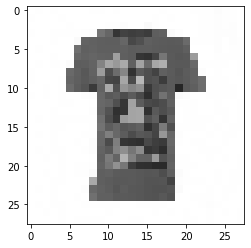

In [61]:
img_path = 'Футболка.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [62]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [63]:
prediction = model.predict(x)
prediction

array([[6.9418299e-01, 4.2498070e-03, 1.9346179e-02, 1.7447303e-01,
        4.2878878e-03, 4.7745243e-06, 9.2399046e-02, 5.0392275e-05,
        1.0994280e-02, 1.1589084e-05]], dtype=float32)

In [64]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 0
Название класса: Футболка
